### ASSIGNMENT 4 - HYPER PARAMETER TUNING & CROSS VALIDATION

### Project : Drug Classification with Random Forest

***Goal:*** The project is to train the ***Random Forest Machine learning model*** to classify and predict the drugs type that might be suitable for the patient based on the features/attributes.

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree


In [3]:
#Load dataset

df = pd.read_csv("drug200.csv")
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# Cell 3: Data Preprocessing

X = df.drop("Drug", axis=1)
y = df["Drug"]

categorical_cols = ["Sex", "BP", "Cholesterol"]
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])
X.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043


In [5]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# Cell 5: Define Random Forest + Hyperparameter Grid

param_grid = {
    "n_estimators": [25, 50, 75],       # number of trees
    "criterion": ["gini", "entropy"],   # split criteria
    "max_depth": [3, 5, 10, None],      # depth of trees
    "min_samples_split": [2, 5, 10]     # minimum samples to split
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)


In [7]:
# Fit Model

grid.fit(X_train, y_train)


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [8]:
# Cell 7: Model Evaluation

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Number of trees in the forest:", len(best_model.estimators_))
print("\nBest Parameters:\n", grid.best_params_)
print("\nBest CV Score:\n", grid.best_score_)
print("\nTest Accuracy:\n", accuracy_score(y_test, y_pred))
print("==============================================")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Number of trees in the forest: 50

Best Parameters:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

Best CV Score:
 0.99375

Test Accuracy:
 0.975

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



In [9]:
# Feature Importance

importances = best_model.feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})
feat_imp.sort_values(by="Importance", ascending=False)


,Feature,Importance
4,Na_to_K,0.562263
2,BP,0.243197
0,Age,0.119892
3,Cholesterol,0.058536
1,Sex,0.016112


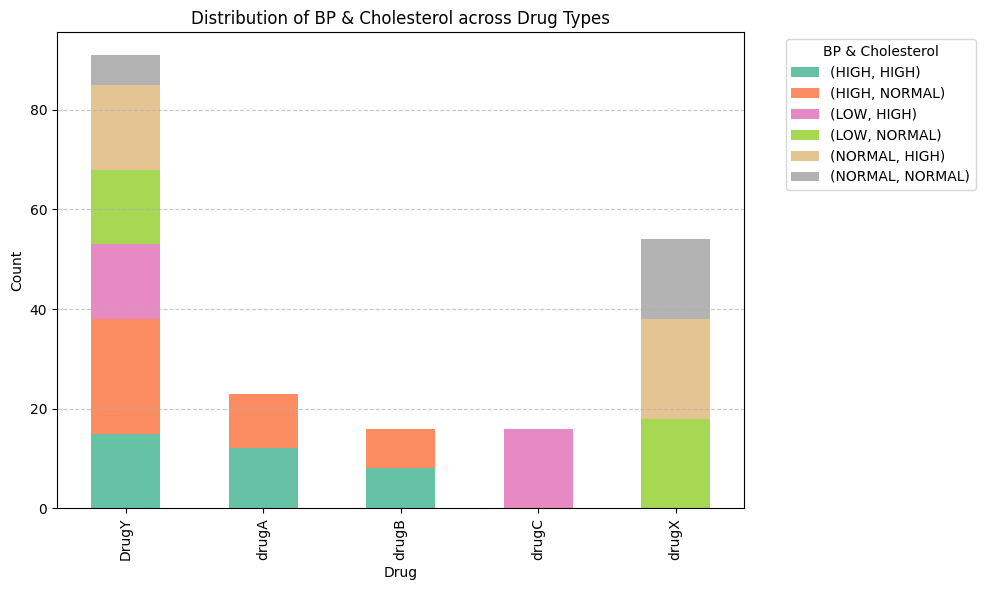

In [10]:
# Visualization - Stacked Bar Chart

ct = pd.crosstab(df["Drug"], [df["BP"], df["Cholesterol"]])
ct.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")

plt.title("Distribution of BP & Cholesterol across Drug Types")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.legend(title="BP & Cholesterol", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


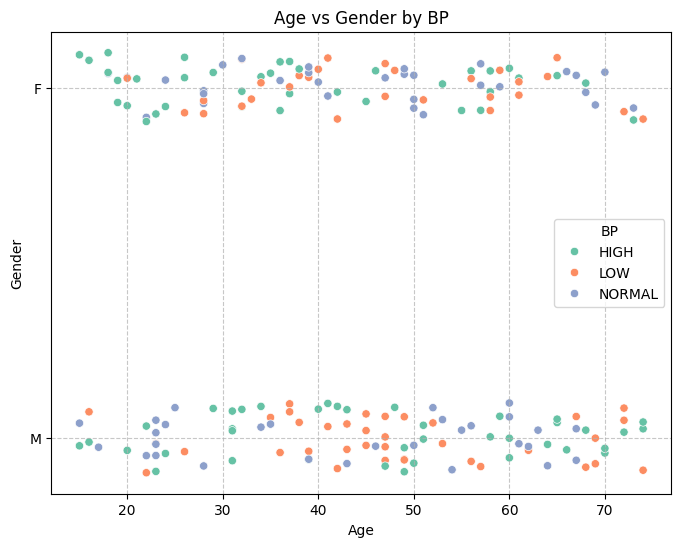

In [11]:
# Visualization - Scatterplot Age vs Gender (with jitter)

df["Sex_jitter"] = df["Sex"].map({"M": 0, "F": 1}) + np.random.uniform(-0.1, 0.1, size=len(df))

plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Sex_jitter", hue="BP", data=df, palette="Set2")
plt.title("Age vs Gender by BP")
plt.xlabel("Age")
plt.ylabel("Gender")
plt.yticks([0, 1], ["M", "F"])
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


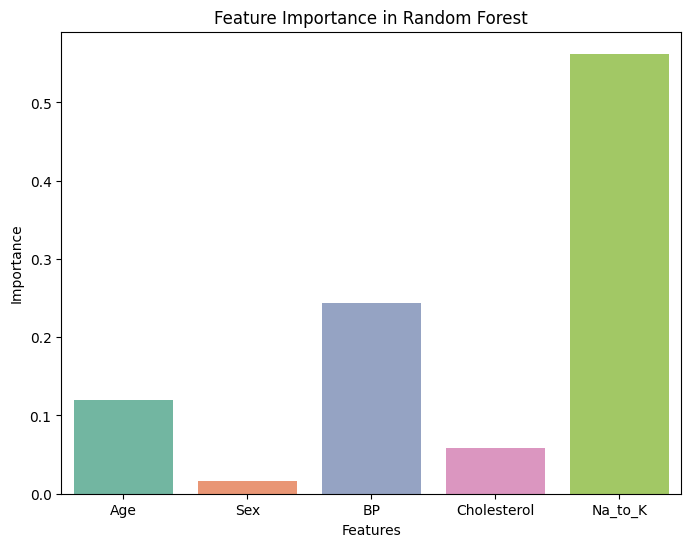

In [12]:
# Visualization - Feature Importance Bar Plot

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Feature", y="Importance", hue="Feature", palette="Set2", dodge=False)
plt.title("Feature Importance in Random Forest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


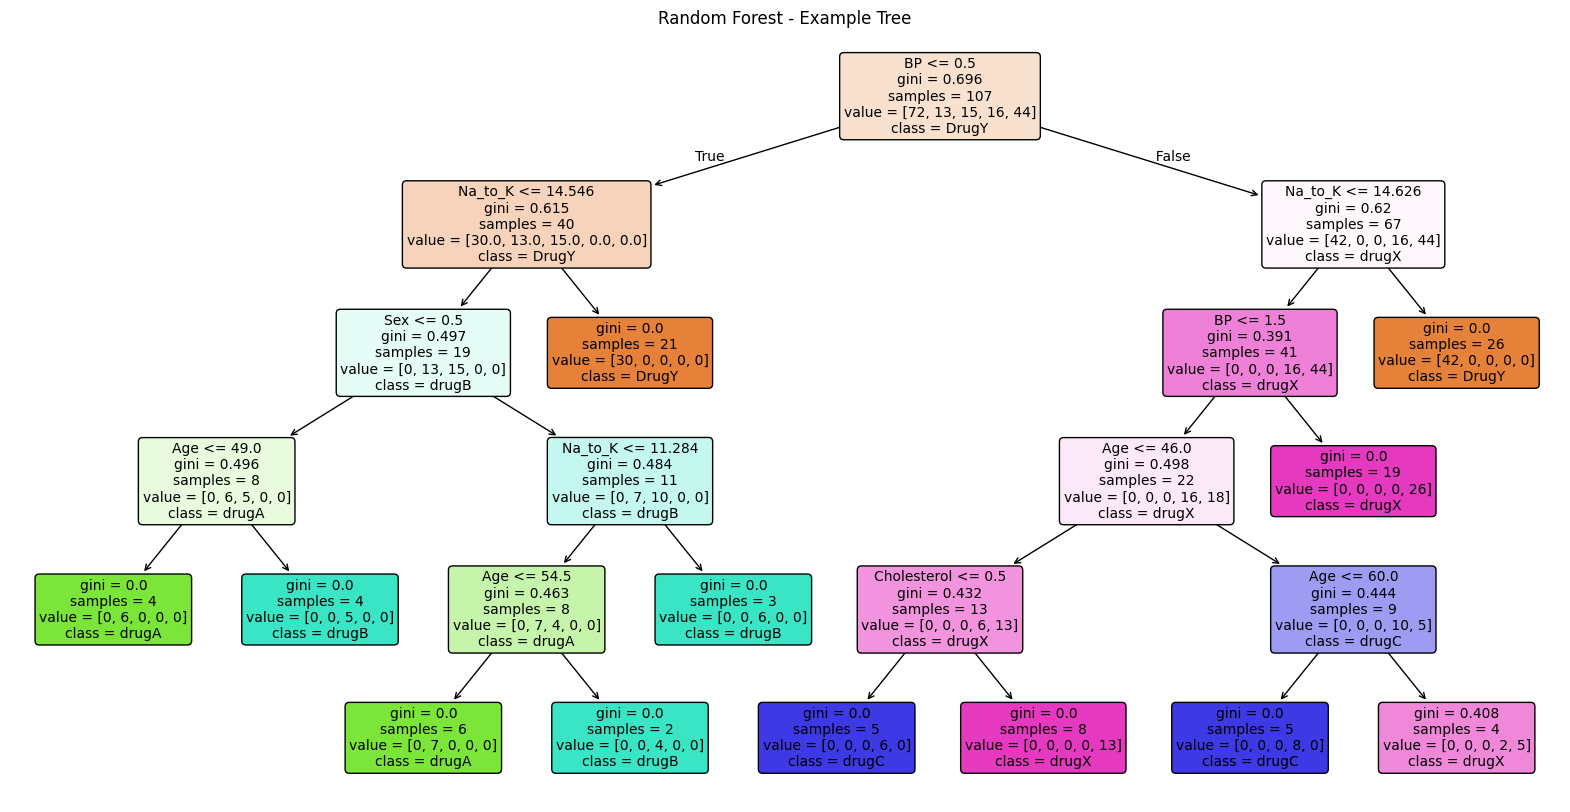

In [13]:
# Visualization - Example Tree from Random Forest

plt.figure(figsize=(20,10))
plot_tree(
    best_model.estimators_[0],           # pick the first tree
    feature_names=X.columns,
    class_names=best_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Random Forest - Example Tree")
plt.show()


### Analysis outcome

The Random Forest model delivered strong accuracy and balanced classification by combining multiple decision trees, reducing overfitting and improving robustness.
Feature importance analysis highlighted key patient attributes, making this ensemble approach both reliable and interpretable for drug prediction tasks.



### Conclusion

Random Forest delivered accurate, robust, and interpretable drug classification by combining multiple decision trees.
